In [8]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
import utils
def run_extremes(N, W, pmf_cust, pmf_serv, gurobi_flag = 0):
    Ex = round (np.sum(np.outer(pmf_cust,pmf_serv)*W), 3) 
    print("Expected cost for c = 0 case:", Ex )
    if gurobi_flag == 1:
        fluid_sol = utils.fluid_solution_gurobi(N, W, pmf_cust, pmf_serv)
    else:
        fluid_sol = utils.fluid_solution(N, W, pmf_cust, pmf_serv,0)
#     print("\nFluid Solution:\n")
#     print(fluid_sol)
    return([Ex,fluid_sol])
def plot_from_sim_paths(file_name, save_file= 0, frac = 0):
    with open(file_name,'rb') as f:
        C_paths_M, Q_paths_M, average_cost_B, average_queue_B, average_new, N, W, pmf_cust, pmf_serv = pickle.load(f)
    (average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M, frac)
    # (average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B, frac)
    [Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
    utils.qc_plot(Ex,fluid_sol,average_queue_B,average_new,average_queue_M,average_cost_M, save_file)

Expected cost for c = 0 case: 4.311
[[1.41421356 2.23606798 3.16227766 4.12310563 5.09901951 2.23606798
  2.82842712 3.60555128 4.47213595 5.38516481 3.16227766 3.60555128
  4.24264069 5.         5.83095189 4.12310563 4.47213595 5.
  5.65685425 6.40312424 5.09901951 5.38516481 5.83095189 6.40312424
  7.07106781]
 [2.23606798 1.41421356 2.23606798 3.16227766 4.12310563 2.82842712
  2.23606798 2.82842712 3.60555128 4.47213595 3.60555128 3.16227766
  3.60555128 4.24264069 5.         4.47213595 4.12310563 4.47213595
  5.         5.65685425 5.38516481 5.09901951 5.38516481 5.83095189
  6.40312424]
 [3.16227766 2.23606798 1.41421356 2.23606798 3.16227766 3.60555128
  2.82842712 2.23606798 2.82842712 3.60555128 4.24264069 3.60555128
  3.16227766 3.60555128 4.24264069 5.         4.47213595 4.12310563
  4.47213595 5.         5.83095189 5.38516481 5.09901951 5.38516481
  5.83095189]
 [4.12310563 3.16227766 2.23606798 1.41421356 2.23606798 4.47213595
  3.60555128 2.82842712 2.23606798 2.82842712 

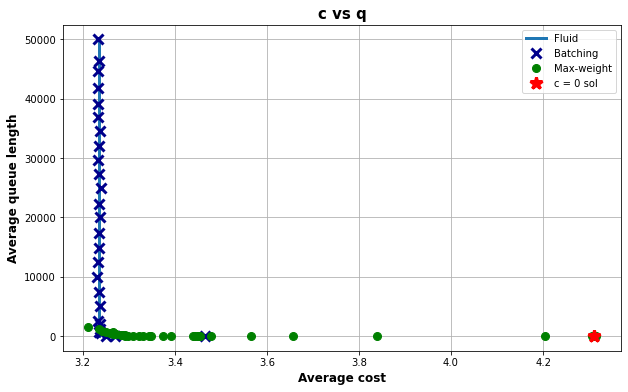

In [3]:
file_name = '../lspu_25_largeq_reverse_geometric.pkl'
plot_from_sim_paths(file_name)

In [3]:
file_name = '../lspu_25_largeq_reverse_geometric.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, average_cost_B, average_queue_B, average_new, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
average_cost_B = average_new
Q_paths_M = np.transpose( np.asarray( Q_paths_M )  )
C_paths_M = np.transpose( np.asarray( C_paths_M ) )
average_cost_M = np.sum(C_paths_M,axis=0)/(Q_paths_M.shape[0] - Q_paths_M[-1,:])
average_queue_M = np.average(Q_paths_M,axis = 0)
print("average cost B", average_cost_B)
print("average cost M", average_cost_M)

PMFs
[0.10773422 0.0969608  0.08726472 0.07853824 0.07068442 0.06361598
 0.05725438 0.05152894 0.04637605 0.04173844 0.0375646  0.03380814
 0.03042733 0.02738459 0.02464613 0.02218152 0.01996337 0.01796703
 0.01617033 0.0145533  0.01309797 0.01178817 0.01060935 0.00954842
 0.00859358] [0.00859358 0.00954842 0.01060935 0.01178817 0.01309797 0.0145533
 0.01617033 0.01796703 0.01996337 0.02218152 0.02464613 0.02738459
 0.03042733 0.03380814 0.0375646  0.04173844 0.04637605 0.05152894
 0.05725438 0.06361598 0.07068442 0.07853824 0.08726472 0.0969608
 0.10773422]
average cost B [3.46660691 3.27105026 3.25060415 3.23880355 3.23428089 3.23734796
 3.23849153 3.23266798 3.2373854  3.23513884 3.23134565 3.23337027
 3.23446431 3.23596946 3.23821011 3.23573468 3.23981254 3.23605542
 3.23394411 3.23458125 3.23803452 3.23272495 3.23381604 3.23379405
 3.23322313 3.23633525 3.23273043]
average cost M [4.31423252 4.30596688 4.31199192 4.31033658 4.20321492 3.83998931
 3.65661628 3.56629016 3.47896202 3

In [ ]:
file_name = '../lspu_25_largeq_reverse_geometric_batch_new.pkl'
with open(file_name,'rb') as f:
    C_paths_M0, Q_paths_M0, average_cost_B2, average_queue_B2, average_new, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
average_cost_B2 = average_new
print(pmf_cust,pmf_serv)
print("average cost B", average_cost_B)
#print("average cost M", average_cost_M)

PMFs
[0.10773422 0.0969608  0.08726472 0.07853824 0.07068442 0.06361598
 0.05725438 0.05152894 0.04637605 0.04173844 0.0375646  0.03380814
 0.03042733 0.02738459 0.02464613 0.02218152 0.01996337 0.01796703
 0.01617033 0.0145533  0.01309797 0.01178817 0.01060935 0.00954842
 0.00859358] [0.00859358 0.00954842 0.01060935 0.01178817 0.01309797 0.0145533
 0.01617033 0.01796703 0.01996337 0.02218152 0.02464613 0.02738459
 0.03042733 0.03380814 0.0375646  0.04173844 0.04637605 0.05152894
 0.05725438 0.06361598 0.07068442 0.07853824 0.08726472 0.0969608
 0.10773422]
average cost B [3.46660691 3.27105026 3.25060415 3.23880355 3.23428089 3.23734796
 3.23849153 3.23266798 3.2373854  3.23513884 3.23134565 3.23337027
 3.23446431 3.23596946 3.23821011 3.23573468 3.23981254 3.23605542
 3.23394411 3.23458125 3.23803452 3.23272495 3.23381604 3.23379405
 3.23322313 3.23633525 3.23273043]
average cost M [4.31423252 4.30596688 4.31199192 4.31033658 4.20321492 3.83998931
 3.65661628 3.56629016 3.47896202 3

In [ ]:
file_name = '../lspu_25_largeq_reverse_geometric_batch_new.pkl'
with open(file_name,'rb') as f:
    C_paths_M1, Q_paths_M1, average_cost_B0, average_queue_B0, average_new, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
Q_paths_M = np.transpose( np.asarray( Q_paths_M1 )  )
C_paths_M = np.transpose( np.asarray( C_paths_M1 ) )
average_cost_M = np.sum(C_paths_M,axis=0)/(Q_paths_M.shape[0] - Q_paths_M[-1,:])
average_queue_M = np.average(Q_paths_M,axis = 0)
print(pmf_cust,pmf_serv)
print("average cost B", average_cost_B)
print("average cost M", average_cost_M)

PMFs
[0.10773422 0.0969608  0.08726472 0.07853824 0.07068442 0.06361598
 0.05725438 0.05152894 0.04637605 0.04173844 0.0375646  0.03380814
 0.03042733 0.02738459 0.02464613 0.02218152 0.01996337 0.01796703
 0.01617033 0.0145533  0.01309797 0.01178817 0.01060935 0.00954842
 0.00859358] [0.00859358 0.00954842 0.01060935 0.01178817 0.01309797 0.0145533
 0.01617033 0.01796703 0.01996337 0.02218152 0.02464613 0.02738459
 0.03042733 0.03380814 0.0375646  0.04173844 0.04637605 0.05152894
 0.05725438 0.06361598 0.07068442 0.07853824 0.08726472 0.0969608
 0.10773422]
average cost B [3.46660691 3.27105026 3.25060415 3.23880355 3.23428089 3.23734796
 3.23849153 3.23266798 3.2373854  3.23513884 3.23134565 3.23337027
 3.23446431 3.23596946 3.23821011 3.23573468 3.23981254 3.23605542
 3.23394411 3.23458125 3.23803452 3.23272495 3.23381604 3.23379405
 3.23322313 3.23633525 3.23273043]
average cost M [3.29707524]


In [21]:
file_name = '../lspu_25_largeq_reverse_geometric_batch_new_2.pkl'
with open(file_name,'rb') as f:
    C_paths_M0, Q_paths_M0, average_cost_B2, average_queue_B2, average_new, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
average_cost_B2 = average_new
print(pmf_cust,pmf_serv)
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar = fluid_sol['Cost']
print(Cstar)

PMFs
[0.10773422 0.0969608  0.08726472 0.07853824 0.07068442 0.06361598
 0.05725438 0.05152894 0.04637605 0.04173844 0.0375646  0.03380814
 0.03042733 0.02738459 0.02464613 0.02218152 0.01996337 0.01796703
 0.01617033 0.0145533  0.01309797 0.01178817 0.01060935 0.00954842
 0.00859358] [0.00859358 0.00954842 0.01060935 0.01178817 0.01309797 0.0145533
 0.01617033 0.01796703 0.01996337 0.02218152 0.02464613 0.02738459
 0.03042733 0.03380814 0.0375646  0.04173844 0.04637605 0.05152894
 0.05725438 0.06361598 0.07068442 0.07853824 0.08726472 0.0969608
 0.10773422]
Expected cost for c = 0 case: 4.311
[[1.41421356 2.23606798 3.16227766 4.12310563 5.09901951 2.23606798
  2.82842712 3.60555128 4.47213595 5.38516481 3.16227766 3.60555128
  4.24264069 5.         5.83095189 4.12310563 4.47213595 5.
  5.65685425 6.40312424 5.09901951 5.38516481 5.83095189 6.40312424
  7.07106781]
 [2.23606798 1.41421356 2.23606798 3.16227766 4.12310563 2.82842712
  2.23606798 2.82842712 3.60555128 4.47213595 3.60555

In [ ]:
average_cost_B = np.concatenate((average_cost_B, average_cost_B2))
average_queue_B = np.concatenate((average_queue_B, average_queue_B2))

In [31]:
average_queue_B

array([5.50000e+00, 2.55000e+01, 5.05000e+01, 5.00500e+02, 7.50250e+02,
       1.25050e+03, 2.00050e+03, 2.50050e+03, 5.00050e+03, 7.47550e+03,
       1.00005e+04, 1.25005e+04, 1.49005e+04, 1.73505e+04, 2.00005e+04,
       2.23255e+04, 2.50005e+04, 2.72755e+04, 2.96005e+04, 3.20005e+04,
       3.45005e+04, 3.68755e+04, 3.92005e+04, 4.18505e+04, 4.46005e+04,
       4.63755e+04, 5.00005e+04, 5.05000e+01, 1.00500e+02, 1.50400e+02,
       2.00500e+02, 2.50500e+02, 3.00100e+02, 3.50200e+02, 4.00500e+02,
       4.50100e+02, 5.00500e+02, 5.05000e+01, 1.00500e+02, 1.50400e+02,
       2.00500e+02, 2.50500e+02, 3.00100e+02, 3.50200e+02, 4.00500e+02,
       4.50100e+02, 5.00500e+02])

In [7]:
# Get the sorted indices of x
sorted_indices = np.argsort(average_queue_B)

# Sort x and reorder y accordingly
average_cost_B = average_cost_B[sorted_indices]
average_queue_B = average_queue_B[sorted_indices]

# Get the sorted indices of x
sorted_indices = np.argsort(average_queue_M)

# Sort x and reorder y accordingly
average_cost_M = average_cost_M[sorted_indices]
average_queue_M = average_queue_M[sorted_indices]

In [41]:
average_queue_B

array([5.50000e+00, 2.55000e+01, 5.05000e+01, 5.05000e+01, 5.05000e+01,
       1.00500e+02, 1.00500e+02, 1.50400e+02, 1.50400e+02, 2.00500e+02,
       2.00500e+02, 2.50500e+02, 2.50500e+02, 3.00100e+02, 3.00100e+02,
       3.50200e+02, 3.50200e+02, 4.00500e+02, 4.00500e+02, 4.50100e+02,
       4.50100e+02, 5.00500e+02, 5.00500e+02, 5.00500e+02, 7.50250e+02,
       1.25050e+03, 2.00050e+03, 2.50050e+03, 5.00050e+03, 7.47550e+03,
       1.00005e+04, 1.25005e+04, 1.49005e+04, 1.73505e+04, 2.00005e+04,
       2.23255e+04, 2.50005e+04, 2.72755e+04, 2.96005e+04, 3.20005e+04,
       3.45005e+04, 3.68755e+04, 3.92005e+04, 4.18505e+04, 4.46005e+04,
       4.63755e+04, 5.00005e+04])

In [8]:
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)

Expected cost for c = 0 case: 4.311
[[1.41421356 2.23606798 3.16227766 4.12310563 5.09901951 2.23606798
  2.82842712 3.60555128 4.47213595 5.38516481 3.16227766 3.60555128
  4.24264069 5.         5.83095189 4.12310563 4.47213595 5.
  5.65685425 6.40312424 5.09901951 5.38516481 5.83095189 6.40312424
  7.07106781]
 [2.23606798 1.41421356 2.23606798 3.16227766 4.12310563 2.82842712
  2.23606798 2.82842712 3.60555128 4.47213595 3.60555128 3.16227766
  3.60555128 4.24264069 5.         4.47213595 4.12310563 4.47213595
  5.         5.65685425 5.38516481 5.09901951 5.38516481 5.83095189
  6.40312424]
 [3.16227766 2.23606798 1.41421356 2.23606798 3.16227766 3.60555128
  2.82842712 2.23606798 2.82842712 3.60555128 4.24264069 3.60555128
  3.16227766 3.60555128 4.24264069 5.         4.47213595 4.12310563
  4.47213595 5.         5.83095189 5.38516481 5.09901951 5.38516481
  5.83095189]
 [4.12310563 3.16227766 2.23606798 1.41421356 2.23606798 4.47213595
  3.60555128 2.82842712 2.23606798 2.82842712 

In [9]:
Cstar = fluid_sol['Cost']
print(Cstar)

3.2353891814339213


In [24]:
file_name = '../lspu_25_largeq_reverse_geometric_maxweight_new.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, average_cost_B, average_queue_B, average_new, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
average_cost_B = average_new
Q_paths_M = np.transpose( np.asarray( Q_paths_M )  )
C_paths_M = np.transpose( np.asarray( C_paths_M ) )
average_cost_M = np.sum(C_paths_M,axis=0)/(Q_paths_M.shape[0] - Q_paths_M[-1,:])
average_queue_M = np.average(Q_paths_M,axis = 0)
print("average cost B", average_cost_B)
print("average cost M", average_cost_M)

PMFs
[0.10773422 0.0969608  0.08726472 0.07853824 0.07068442 0.06361598
 0.05725438 0.05152894 0.04637605 0.04173844 0.0375646  0.03380814
 0.03042733 0.02738459 0.02464613 0.02218152 0.01996337 0.01796703
 0.01617033 0.0145533  0.01309797 0.01178817 0.01060935 0.00954842
 0.00859358] [0.00859358 0.00954842 0.01060935 0.01178817 0.01309797 0.0145533
 0.01617033 0.01796703 0.01996337 0.02218152 0.02464613 0.02738459
 0.03042733 0.03380814 0.0375646  0.04173844 0.04637605 0.05152894
 0.05725438 0.06361598 0.07068442 0.07853824 0.08726472 0.0969608
 0.10773422]
average cost B [nan]
average cost M [4.30393057 4.3132361  4.31094391 4.31344448 4.31188781 4.31113098
 4.31306927 4.31287117 4.31119884 4.31058963 4.31086039 4.3130291
 4.30846262 4.3082835  4.31071172 4.30794954 4.31109849 4.30487354
 4.30973128 4.31270897 4.31261319 4.29425659 4.30037618 4.19628563
 3.98819531 3.90005936 3.75155286 3.61759004 3.48275004 3.39707903
 3.37981882 3.38227117 3.35789455 3.34838128 3.33682234 3.3318449

[-1.51240752  0.10215233] [0.29445767]
[-0.82774026  0.49404348] [0.0624679]


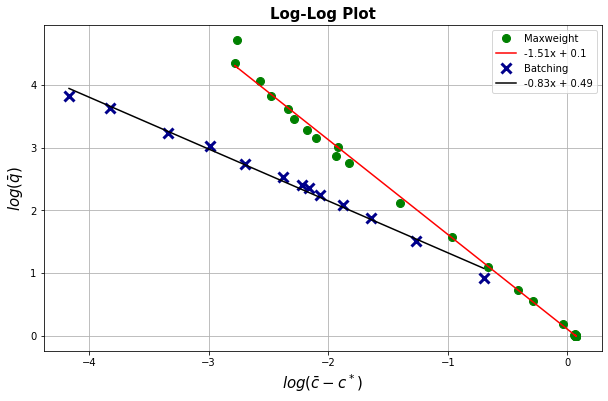

In [26]:
# Polynomial fit
deg = 1
xM2 = np.log(average_cost_M-Cstar)
yM2 = np.log(average_queue_M)
xB2 = np.log(average_cost_B2-Cstar)
yB2 = np.log(average_queue_B2)




p, res, _, _, _ = np.polyfit(xM2, yM2, 1, full=True)
print(p,res)
plt.figure( figsize=(10,6) )
plt.plot(xM2, yM2,'go',markersize = 8)
predict_2 = np.poly1d(p)
x  = np.array(xM2)
y = predict_2(x)
plt.plot(x, y,'r')
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Maxweight",str(round(predict_2[1],2))+"x + " + str(round(predict_2[0],2)), "Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

In [ ]:
average_queue_M

array([  1.     ,   1.     ,   1.     ,   1.     ,   1.     ,   1.     ,
         1.     ,   1.     ,   1.     ,   1.     ,   1.     ,   1.     ,
         1.     ,   1.     ,   1.     ,   1.     ,   1.     ,   1.     ,
         1.     ,   1.     ,   1.     ,   1.01488,   1.01975,   1.1985 ,
         1.72587,   2.05769,   2.97698,   4.79571,   8.30083,  15.68133,
        17.62943,  20.22581,  23.3975 ,  26.79187,  31.4963 ,  37.34222,
        45.67031,  57.95122,  77.49687, 112.36092])

[-1.51240752  0.10215233] [0.29445767]
[-0.82774026  0.49404348] [0.0624679]


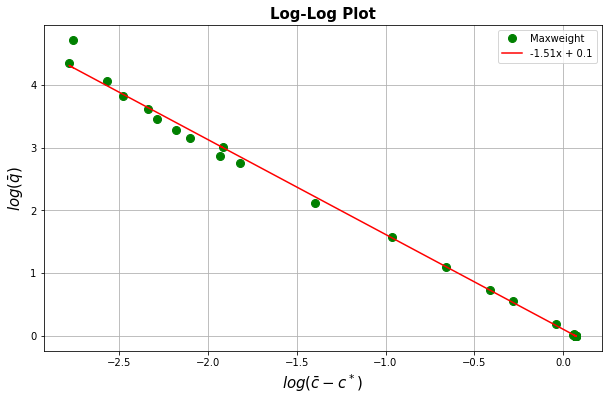

In [27]:
# Polynomial fit
deg = 1
xM2 = np.log(average_cost_M-Cstar)
yM2 = np.log(average_queue_M)
# xB2 = np.log(average_cost_B_good-Cstar)
# yB2 = np.log(average_queue_B_good)




p, res, _, _, _ = np.polyfit(xM2, yM2, 1, full=True)
print(p,res)
plt.figure( figsize=(10,6) )
plt.plot(xM2, yM2,'go',markersize = 8)
predict_2 = np.poly1d(p)
x  = np.array(xM2)
y = predict_2(x)
plt.plot(x, y,'r')
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
#plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
#predict2_2 = np.poly1d(pB)
#x  = np.array(xB2)
#y = predict2_2(x)
#plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Maxweight",str(round(predict_2[1],2))+"x + " + str(round(predict_2[0],2))])

In [14]:
average_cost_M

array([4.30393057, 4.31261319, 4.30973128, 4.30487354, 4.31109849,
       4.30794954, 4.31071172, 4.3082835 , 4.30846262, 4.3130291 ,
       4.31270897, 4.31058963, 4.31119884, 4.31287117, 4.31306927,
       4.31113098, 4.31188781, 4.31344448, 4.31094391, 4.31086039,
       4.3132361 , 4.29425659, 4.30037618, 4.19628563, 3.98819531,
       3.90005936, 3.75155286, 3.61759004, 3.48275004, 3.39707903,
       3.37981882, 3.38227117, 3.35789455, 3.34838128, 3.33682234,
       3.33184497, 3.3192693 , 3.31193269, 3.29722595, 3.29863321])

In [16]:
average_queue_M

array([  1.     ,   1.     ,   1.     ,   1.     ,   1.     ,   1.     ,
         1.     ,   1.     ,   1.     ,   1.     ,   1.     ,   1.     ,
         1.     ,   1.     ,   1.     ,   1.     ,   1.     ,   1.     ,
         1.     ,   1.     ,   1.     ,   1.01488,   1.01975,   1.1985 ,
         1.72587,   2.05769,   2.97698,   4.79571,   8.30083,  15.68133,
        17.62943,  20.22581,  23.3975 ,  26.79187,  31.4963 ,  37.34222,
        45.67031,  57.95122,  77.49687, 112.36092])

In [17]:
Ex

4.311

At least the estimate is good

In [28]:
file_name = '../lspu_25_largeq_reverse_geometric_maxweight_new-1.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, average_cost_B, average_queue_B, average_new, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
average_cost_B = average_new
Q_paths_M = np.transpose( np.asarray( Q_paths_M )  )
C_paths_M = np.transpose( np.asarray( C_paths_M ) )
average_cost_M2 = np.sum(C_paths_M,axis=0)/(Q_paths_M.shape[0] - Q_paths_M[-1,:])
average_queue_M2 = np.average(Q_paths_M,axis = 0)

PMFs
[0.10773422 0.0969608  0.08726472 0.07853824 0.07068442 0.06361598
 0.05725438 0.05152894 0.04637605 0.04173844 0.0375646  0.03380814
 0.03042733 0.02738459 0.02464613 0.02218152 0.01996337 0.01796703
 0.01617033 0.0145533  0.01309797 0.01178817 0.01060935 0.00954842
 0.00859358] [0.00859358 0.00954842 0.01060935 0.01178817 0.01309797 0.0145533
 0.01617033 0.01796703 0.01996337 0.02218152 0.02464613 0.02738459
 0.03042733 0.03380814 0.0375646  0.04173844 0.04637605 0.05152894
 0.05725438 0.06361598 0.07068442 0.07853824 0.08726472 0.0969608
 0.10773422]


[-1.51240752  0.10215233] [0.29445767]
[-2.32042342 -1.46817204] [2.20614533]


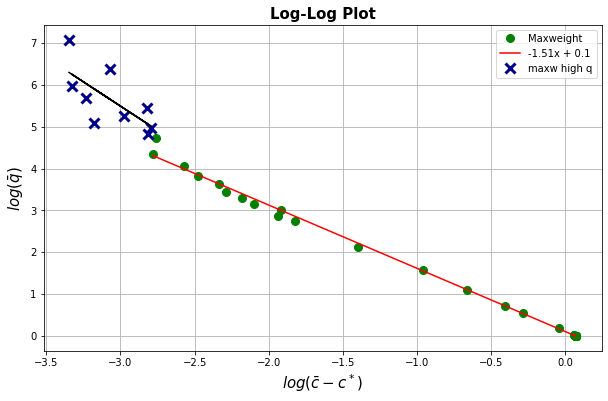

In [34]:
# Polynomial fit
deg = 1
xM2 = np.log(average_cost_M-Cstar)
yM2 = np.log(average_queue_M)
xB2 = np.log(average_cost_M2-Cstar)
yB2 = np.log(average_queue_M2)




p, res, _, _, _ = np.polyfit(xM2, yM2, 1, full=True)
print(p,res)
plt.figure( figsize=(10,6) )
plt.plot(xM2, yM2,'go',markersize = 8)
predict_2 = np.poly1d(p)
x  = np.array(xM2)
y = predict_2(x)
plt.plot(x, y,'r')
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Maxweight",str(round(predict_2[1],2))+"x + " + str(round(predict_2[0],2)),"maxw high q"])

[-1.51240752  0.10215233] [0.29445767]
[-0.82774026  0.49404348] [0.0624679]


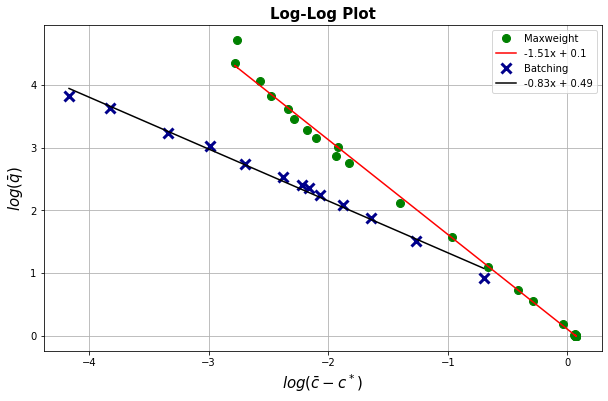

In [32]:
# Polynomial fit
deg = 1
xM2 = np.log(average_cost_M-Cstar)
yM2 = np.log(average_queue_M)
xB2 = np.log(average_cost_B2-Cstar)
yB2 = np.log(average_queue_B2)




p, res, _, _, _ = np.polyfit(xM2, yM2, 1, full=True)
print(p,res)
plt.figure( figsize=(10,6) )
plt.plot(xM2, yM2,'go',markersize = 8)
predict_2 = np.poly1d(p)
x  = np.array(xM2)
y = predict_2(x)
plt.plot(x, y,'r')
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Maxweight",str(round(predict_2[1],2))+"x + " + str(round(predict_2[0],2)), "Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

In [19]:
file_name = '../lspu_25_largeq_reverse_geometric.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, average_cost_B, average_queue_B, average_new, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
average_cost_B = average_new
Q_paths_M = np.transpose( np.asarray( Q_paths_M )  )
C_paths_M = np.transpose( np.asarray( C_paths_M ) )
average_cost_M_OLD = np.sum(C_paths_M,axis=0)/(Q_paths_M.shape[0] - Q_paths_M[-1,:])
average_queue_M_OLD = np.average(Q_paths_M,axis = 0)
# print("average cost B", average_cost_B)
# print("average cost M", average_cost_M)

PMFs
[0.10773422 0.0969608  0.08726472 0.07853824 0.07068442 0.06361598
 0.05725438 0.05152894 0.04637605 0.04173844 0.0375646  0.03380814
 0.03042733 0.02738459 0.02464613 0.02218152 0.01996337 0.01796703
 0.01617033 0.0145533  0.01309797 0.01178817 0.01060935 0.00954842
 0.00859358] [0.00859358 0.00954842 0.01060935 0.01178817 0.01309797 0.0145533
 0.01617033 0.01796703 0.01996337 0.02218152 0.02464613 0.02738459
 0.03042733 0.03380814 0.0375646  0.04173844 0.04637605 0.05152894
 0.05725438 0.06361598 0.07068442 0.07853824 0.08726472 0.0969608
 0.10773422]


[-1.51240752  0.10215233] [0.29445767]
[-1.48175119 -0.04503369] [0.69700888]


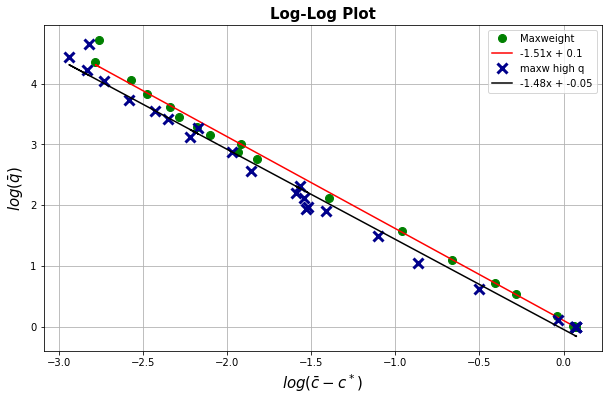

In [40]:
# Polynomial fit
deg = 1
xM2 = np.log(average_cost_M-Cstar)
yM2 = np.log(average_queue_M)
xB2 = np.log(average_cost_M_OLD[:25]-Cstar)
yB2 = np.log(average_queue_M_OLD[:25])




p, res, _, _, _ = np.polyfit(xM2, yM2, 1, full=True)
print(p,res)
plt.figure( figsize=(10,6) )
plt.plot(xM2, yM2,'go',markersize = 8)
predict_2 = np.poly1d(p)
x  = np.array(xM2)
y = predict_2(x)
plt.plot(x, y,'r')
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Maxweight",str(round(predict_2[1],2))+"x + " + str(round(predict_2[0],2)),"maxw high q", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

[-1.51240752  0.10215233] [0.29445767]
[-1.94214946 -0.48341358] [13.12113272]


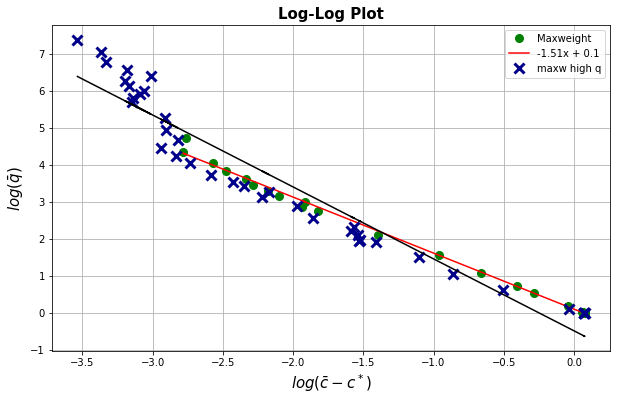

In [37]:
# Polynomial fit
deg = 1
xM2 = np.log(average_cost_M-Cstar)
yM2 = np.log(average_queue_M)
xB2 = np.log(average_cost_M_OLD-Cstar)
yB2 = np.log(average_queue_M_OLD)




p, res, _, _, _ = np.polyfit(xM2, yM2, 1, full=True)
print(p,res)
plt.figure( figsize=(10,6) )
plt.plot(xM2, yM2,'go',markersize = 8)
predict_2 = np.poly1d(p)
x  = np.array(xM2)
y = predict_2(x)
plt.plot(x, y,'r')
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Maxweight",str(round(predict_2[1],2))+"x + " + str(round(predict_2[0],2)),"maxw high q"])

In [41]:
W

array([[1.41421356, 2.23606798, 3.16227766, 4.12310563, 5.09901951,
        2.23606798, 2.82842712, 3.60555128, 4.47213595, 5.38516481,
        3.16227766, 3.60555128, 4.24264069, 5.        , 5.83095189,
        4.12310563, 4.47213595, 5.        , 5.65685425, 6.40312424,
        5.09901951, 5.38516481, 5.83095189, 6.40312424, 7.07106781],
       [2.23606798, 1.41421356, 2.23606798, 3.16227766, 4.12310563,
        2.82842712, 2.23606798, 2.82842712, 3.60555128, 4.47213595,
        3.60555128, 3.16227766, 3.60555128, 4.24264069, 5.        ,
        4.47213595, 4.12310563, 4.47213595, 5.        , 5.65685425,
        5.38516481, 5.09901951, 5.38516481, 5.83095189, 6.40312424],
       [3.16227766, 2.23606798, 1.41421356, 2.23606798, 3.16227766,
        3.60555128, 2.82842712, 2.23606798, 2.82842712, 3.60555128,
        4.24264069, 3.60555128, 3.16227766, 3.60555128, 4.24264069,
        5.        , 4.47213595, 4.12310563, 4.47213595, 5.        ,
        5.83095189, 5.38516481, 5.09901951, 5.